## Code for Generating Samples for Hand Coding & Prediction Analysis

First we combined test data with the predictions and JSTOR meta data. Then we analyzed trends in proportions of perspectives from 1971 - 2015. Lastly we generated 2 sets of samples for handcoding for each of the 6 perspectives (cultural, demographic, and relational in Management & Organizational Behavior and Organizational Sociology):
- 60% majority, 40% minority
- 100% fuzzy

In [1]:
import numpy as np
import pandas as pd
import pickle
import os
def open_test_data(path):
    return open(path, 'rb')

# load test data
with open_test_data('/home/jovyan/work/tlu_storage/filtered_preprocessed_texts_65365_110521.pkl') as f:
    df = pickle.load(f)

In [70]:
def modify_jstor_id(x, col_name, https = False):
    '''
    modify jstor id to get the link in the form of www.jstor.org/stable/23057056
    '''
    
    good_parts = []
    if not https:
        for ii in x[col_name]:
            try: 
                good_parts.append(ii.split('http://')[1])
            except:
                good_parts.append(ii)
    else:
        for ii in x[col_name]:
            try: 
                good_parts.append(ii.split('https://')[1])
            except:
                good_parts.append(ii)
        
    return good_parts

In [71]:
# modify jstor id's

## combine the data for the correct article dates
dates = pd.read_csv('./sample/parts-1-3-metadata.csv')
date2 = pd.read_csv('./sample/part-4-metadata.csv')


date2.id = modify_jstor_id(date2, 'id')


dates.id = modify_jstor_id(dates,'id')

In [72]:
combo = pd.concat([dates, date2])

combo

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,file
0,www.jstor.org/stable/23057056,The Case for Dreaming Big,Sociology of Education,2011,NaN,article,jstor,2011-04-01,2,84,http://www.jstor.org/stable/23057056,Thurston Domina; AnneMarie Conley; George Farkas,"Sage Publications, Inc.",eng,118,121,NaN,1965,4,part-1.jsonl.gz
1,www.jstor.org/stable/24433242,Editors' Report,Sociology,2014,NaN,article,jstor,2014-04-01,2,48,http://www.jstor.org/stable/24433242,Karim Murji; Sarah Neal; Sophie Watson; Kath W...,"Sage Publications, Ltd.",eng,211,215,NaN,1994,5,part-1.jsonl.gz
2,www.jstor.org/stable/10.1525/si.2003.26.2.307,Searching for Yellowstone,Symbolic Interaction,2003,NaN,article,jstor,2003-05-01,2,26,http://www.jstor.org/stable/10.1525/si.2003.26...,Norman K. Denzin,Wiley,eng,307,313,NaN,3214,7,part-1.jsonl.gz
3,www.jstor.org/stable/23654629,The Development of an Autonomous Social Scienc...,Asian Journal of Social Science,2002,NaN,article,jstor,2002-01-01,1,30,http://www.jstor.org/stable/23654629,Syed Hussein Alatas,Brill,eng,150,157,NaN,3822,8,part-1.jsonl.gz
4,www.jstor.org/stable/23262617,THE USE OF PAIRED COMPARISONS IN THE PRESTIGE ...,Humboldt Journal of Social Relations,1987,NaN,article,jstor,1987-10-01,1,15,http://www.jstor.org/stable/23262617,WALTER ABBOTT; WILLIAM F. KENKEL,"Department of Sociology, Humboldt State Univer...",eng,105,117,NaN,4146,13,part-1.jsonl.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,www.jstor.org/stable/41329173,The Political Uses of Some Economic Ideas: The...,American Journal of Economics and Sociology,2011,NaN,article,jstor,2011-10-01,4,70,http://www.jstor.org/stable/41329173,María Jiménez-Buedo,"American Journal of Economics and Sociology, Inc.",eng,1029.0,1052.0,NaN,9127,24,part-1.jsonl.gz
2314,www.jstor.org/stable/23260269,"SOCIAL NETWORKING RELATIONSHIPS, FIRM-SPECIFIC...",Strategic Management Journal,2012,NaN,article,jstor,2012-10-01,10,33,http://www.jstor.org/stable/23260269,MOSES ACQUAAH,Wiley,eng,1215.0,1228.0,NaN,9418,14,part-1.jsonl.gz
2315,www.jstor.org/stable/41329179,A Simple Model of the Surplus Approach to Valu...,American Journal of Economics and Sociology,2011,NaN,article,jstor,2011-11-01,5,70,http://www.jstor.org/stable/41329179,Scott Carter,"American Journal of Economics and Sociology, Inc.",eng,1117.0,1146.0,NaN,10566,30,part-1.jsonl.gz
2316,www.jstor.org/stable/41678753,Deviations From Desired Age at Marriage: Menta...,Journal of Marriage and Family,2012,NaN,article,jstor,2012-08-01,4,74,http://www.jstor.org/stable/41678753,Daniel L. Carlson,National Council on Family Relations,eng,743.0,758.0,NaN,10015,16,part-1.jsonl.gz


In [73]:
# modify the file name to get the numerical part
df['edited_filename'] = df['file_name'].apply(lambda x: x[43:]).apply(lambda x: x[:-4])

In [74]:
df

,file_name,text,edited_filename,cult_pred,cult_score,dem_pred,dem_score,rel_pred,rel_score,org_pred,org_score
0,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Research, Note, Church, Membership, in, The,...",10.2307_1387034,0,0.000020,0,0.141150,1,0.955541,0,0.138968
1,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[polish, (io),oo, sociological, review, ISSN,...",10.2307_41274754,0,0.000053,1,0.526200,1,0.812859,0,0.000737
2,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Article, ■jjDlBSj, grapliy, Compassionate, a...",10.2307_24467156,0,0.000296,0,0.000870,0,0.001053,1,0.999190
3,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[REPLY, TO, ALLISON:, MORE, ON, COMPARING, RE...",10.2307_2782279,0,0.000023,0,0.000879,0,0.000304,0,0.000035
4,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Determinants, of, Spousal, Interaction:, Mar...",10.2307_351656,0,0.000008,0,0.030665,0,0.093733,0,0.000747
...,...,...,...,...,...,...,...,...,...,...,...
65360,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[JOURNAL, OF, MANAGERIAL, ISSUES, Vol., XXIII...",10.2307_23209226,0,0.000016,0,0.000224,0,0.000505,1,0.986334
65361,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Social, Psychology, Quarterly, Vol., No., Tr...",10.2307_3033940,0,0.001025,0,0.011639,0,0.001370,0,0.000295
65362,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[COMPULSORY, CLOSETS, AND, THE, SOCIAL, CONTE...",10.2307_41888820,0,0.041685,0,0.112509,1,0.957716,0,0.000315
65363,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[mir, vol., mir, IfflullQQOITIOiii, Internoti...",10.2307_40658172,0,0.000013,0,0.013986,0,0.000276,1,0.999999


In [75]:
## load in meta data for each articles 
root = '/home/jovyan/work/'
meta_fp = root + '/dictionary_methods/code/metadata_combined.h5' 

df_meta = pd.read_hdf(meta_fp)
df_meta.reset_index(drop=False, inplace=True) # extract file name from index

# For merging purposes, get ID alone from file name, e.g. 'journal-article-10.2307_2065002' -> '10.2307_2065002'
df_meta['edited_filename'] = df_meta['file_name'].apply(lambda x: x[16:]) 
df_meta = df_meta[["edited_filename", "article_name", "jstor_url", "abstract", "journal_title", "given_names", "primary_subject", "year", "type"]] # keep only relevant columns

df_meta

,edited_filename,article_name,jstor_url,abstract,journal_title,given_names,primary_subject,year,type
0,10.2307_4167860,Cross-Dialectal Variation in Arabic: Competing...,https://www.jstor.org/stable/4167860,Most researchers of Arabic sociolinguistics as...,Language in Society,None,Other,1979,research-article
1,10.2307_2578336,None,https://www.jstor.org/stable/2578336,None,Social Forces,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1983,book-review
2,10.2307_2654760,None,https://www.jstor.org/stable/2654760,None,Contemporary Sociology,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1998,book-review
3,10.2307_43242281,editor's note: A KNIGHT'S TALE,https://www.jstor.org/stable/43242281,None,Corporate Knights,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Other,2005,misc
4,10.2307_42862018,None,https://www.jstor.org/stable/42862018,None,Social Science Quarterly,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1985,book-review
...,...,...,...,...,...,...,...,...,...
238496,10.2307_2065941,None,https://www.jstor.org/stable/2065941,None,Contemporary Sociology,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,1978,book-review
238497,10.2307_2634781,"Bundling Information Goods: Pricing, Profits, ...",https://www.jstor.org/stable/2634781,We study the strategy of bundling a large numb...,Management Science,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Management & Organizational Behavior,1993,research-article
238498,10.1525_irqr.2011.4.3.193,Growing Up Katie Xin Yan,https://www.jstor.org/stable/10.1525/irqr.2011...,None,International Review of Qualitative Research,None,Sociology,2011,research-article
238499,10.2307_3120334,None,https://www.jstor.org/stable/3120334,None,British Journal of Educational Studies,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Other,1973,book-review


In [76]:
# merge meta data with prediction
merged = df_meta.merge(df, on = 'edited_filename')
merged

,edited_filename,article_name,jstor_url,abstract,journal_title,given_names,primary_subject,year,type,file_name,text,cult_pred,cult_score,dem_pred,dem_score,rel_pred,rel_score,org_pred,org_score
0,10.2307_351312,Sex-Role Congruency and Marital Quality,https://www.jstor.org/stable/351312,Drawing upon a probability sample of 331 milit...,Journal of Marriage and Family,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1976,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Sex-role, Congruency, and, Marital, Quality,...",0,0.000027,0,0.009748,0,0.001115,0,0.001976
1,10.2307_1171381,"Bosses, Machines, and Democratic Leadership: P...",https://www.jstor.org/stable/1171381,None,Social Science History,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1986,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Bosses,, Machines,, and, Democratic, Leaders...",0,0.000102,0,0.015387,1,0.906071,1,0.999703
2,10.2307_20832283,"RECOGNIZING GENDER BIAS, REJECTING FEMINISM: A...",https://www.jstor.org/stable/20832283,This article explores the degree to which cler...,Sociological Focus,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,2006,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[RECOGNIZING, GENDER, BIAS,, REJECTING, FEMIN...",1,0.510241,1,0.999751,0,0.000425,1,0.991251
3,10.2307_2096207,Survival Chances of Newly Founded Business Org...,https://www.jstor.org/stable/2096207,Human capital theory and organizational ecolog...,American Sociological Review,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,1991,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[SURVIVAL, CHANCES, OF, NEWLY, FOUNDED, BUSIN...",0,0.000016,1,0.999898,0,0.000264,1,0.999999
4,10.2307_2391724,Dimensions of Organizational Influence and The...,https://www.jstor.org/stable/2391724,"In this study participativeness, centralizatio...",Administrative Science Quarterly,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Management & Organizational Behavior,1971,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Dimensions, of, Organizational, Influence, a...",0,0.000022,0,0.000167,0,0.473573,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65360,10.2307_3710739,Continuity and Quest in the Work of Harvey Cox,https://www.jstor.org/stable/3710739,None,Sociological Analysis,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,1977,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Sociological, Analysis, Continuity, and, Que...",0,0.000215,0,0.003004,0,0.003886,0,0.031727
65361,10.2307_41960775,"our animals, ourselves",https://www.jstor.org/stable/41960775,None,Contexts,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,2010,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Animals,, though,, remain, vitally, importan...",1,0.999609,0,0.002722,0,0.020569,0,0.002280
65362,10.2307_41721417,The Importance of Word of Mouth for Museums: A...,https://www.jstor.org/stable/41721417,"For some time now, the literature on general m...",International Journal of Arts Management,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Management & Organizational Behavior,2012,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[INTERNATIONAL, JOURNAL, OF, ARTS, MANAGEMENT...",0,0.000030,0,0.000387,1,0.762122,1,0.999909
65363,10.2307_2634781,"Bundling Information Goods: Pricing, Profits, ...",https://www.jstor.org/stable/2634781,We study the strategy of bundling a large numb...,Management Science,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Management & Organizational Behavior,1993,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Bundling, Information, Goods:, Pricing,, Pro...",0,0.000021,0,0.000190,0,0.002899,1,0.920262


In [78]:
merged.jstor_url = modify_jstor_id(merged, 'jstor_url', True)

In [80]:
# merge with jstor article date data
merged = merged.merge(combo, left_on = 'jstor_url', right_on = 'id', how = 'left').drop(['year'], axis = 1)

In [81]:
merged

,edited_filename,article_name,jstor_url,abstract,journal_title,given_names,primary_subject,type,file_name,text,...,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,file
0,10.2307_351312,Sex-Role Congruency and Marital Quality,www.jstor.org/stable/351312,Drawing upon a probability sample of 331 milit...,Journal of Marriage and Family,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Sex-role, Congruency, and, Marital, Quality,...",...,http://www.jstor.org/stable/351312,Gary Lee Bowen; Dennis K. Orthner,Wiley,eng,223,230,NaN,5495.0,8.0,part-2.jsonl.gz
1,10.2307_1171381,"Bosses, Machines, and Democratic Leadership: P...",www.jstor.org/stable/1171381,None,Social Science History,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Bosses,, Machines,, and, Democratic, Leaders...",...,http://www.jstor.org/stable/1171381,Philip R. Vandermeer,Cambridge University Press,eng,395,428,NaN,12315.0,34.0,part-1.jsonl.gz
2,10.2307_20832283,"RECOGNIZING GENDER BIAS, REJECTING FEMINISM: A...",www.jstor.org/stable/20832283,This article explores the degree to which cler...,Sociological Focus,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[RECOGNIZING, GENDER, BIAS,, REJECTING, FEMIN...",...,http://www.jstor.org/stable/20832283,SUSAN R. CODY,"Taylor & Francis, Ltd.",eng,37,53,NaN,9241.0,17.0,part-1.jsonl.gz
3,10.2307_2096207,Survival Chances of Newly Founded Business Org...,www.jstor.org/stable/2096207,Human capital theory and organizational ecolog...,American Sociological Review,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[SURVIVAL, CHANCES, OF, NEWLY, FOUNDED, BUSIN...",...,http://www.jstor.org/stable/2096207,Josef Brüderl; Peter Preisendörfer; Rolf Ziegler,American Sociological Association,eng,227,242,NaN,10467.0,16.0,part-1.jsonl.gz
4,10.2307_2391724,Dimensions of Organizational Influence and The...,www.jstor.org/stable/2391724,"In this study participativeness, centralizatio...",Administrative Science Quarterly,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Management & Organizational Behavior,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Dimensions, of, Organizational, Influence, a...",...,http://www.jstor.org/stable/2391724,Johannes M. Pennings,"Sage Publications, Inc.",eng,688,699,NaN,6022.0,12.0,part-1.jsonl.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65360,10.2307_3710739,Continuity and Quest in the Work of Harvey Cox,www.jstor.org/stable/3710739,None,Sociological Analysis,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Sociological, Analysis, Continuity, and, Que...",...,http://www.jstor.org/stable/3710739,Benton Johnson,Oxford University Press,eng,79,83,NaN,2962.0,5.0,part-2.jsonl.gz
65361,10.2307_41960775,"our animals, ourselves",www.jstor.org/stable/41960775,None,Contexts,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Animals,, though,, remain, vitally, importan...",...,http://www.jstor.org/stable/41960775,arnold arluke,"Sage Publications, Inc.",eng,34,39,NaN,3527.0,6.0,part-3.jsonl.gz
65362,10.2307_41721417,The Importance of Word of Mouth for Museums: A...,www.jstor.org/stable/41721417,"For some time now, the literature on general m...",International Journal of Arts Management,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Management & Organizational Behavior,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[INTERNATIONAL, JOURNAL, OF, ARTS, MANAGEMENT...",...,http://www.jstor.org/stable/41721417,Andrea Ha

In [82]:
## open and add in the prediction data for the 65 k articles

with open_test_data('/home/jovyan/work/nancyxu/predictions/model_cult.bin_pred.pkl') as f:
    cult_pred = pickle.load(f)
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/model_cult.bin_score.pkl') as f:
    cult_score = pickle.load(f)
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/model_dem.bin_pred.pkl') as f:
    dem_pred = pickle.load(f)
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/model_dem.bin_score.pkl') as f:
    dem_score = pickle.load(f)
    
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/rel_pred_a.pkl') as f:
    rel_pred = pickle.load(f)
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/rel_scores_a.pkl') as f:
    rel_score = pickle.load(f)

        
with open_test_data('/home/jovyan/work/nancyxu/predictions/model_orgs.bin_pred.pkl') as f:
    org_pred = pickle.load(f)
    
with open_test_data('/home/jovyan/work/nancyxu/predictions/model_orgs.bin_score.pkl') as f:
    org_score = pickle.load(f)

merged['cult_pred'] = cult_pred
merged['cult_score'] = cult_score
merged['dem_pred'] = dem_pred
merged['dem_score'] = dem_score
merged['rel_pred'] = rel_pred
merged['rel_score'] = rel_score
merged['org_pred'] = org_pred
merged['org_score'] = org_score

In [84]:
# filter out sociology articles to only be organizational sociology
minority_threshold_orgs = 0.7
df_orgsoc = merged[merged['primary_subject']=='Sociology'][merged['org_score'] > minority_threshold_orgs]



/tmp/ipykernel_4170/2654953385.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orgsoc = merged[merged['primary_subject']=='Sociology'][merged['org_score'] > minority_threshold_orgs]


In [107]:
df_orgsoc

,edited_filename,article_name,jstor_url,abstract,journal_title,given_names,primary_subject,type,file_name,text,...,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,file
2,10.2307_20832283,"RECOGNIZING GENDER BIAS, REJECTING FEMINISM: A...",www.jstor.org/stable/20832283,This article explores the degree to which cler...,Sociological Focus,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[RECOGNIZING, GENDER, BIAS,, REJECTING, FEMIN...",...,http://www.jstor.org/stable/20832283,SUSAN R. CODY,"Taylor & Francis, Ltd.",eng,37,53,NaN,9241.0,17.0,part-1.jsonl.gz
10,10.2307_2695848,Still Stable after All These Years? Personalit...,www.jstor.org/stable/2695848,Costa and McCrae maintain that personality is ...,Social Psychology Quarterly,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Social, Psychology, Quarterly, Vol., No., St...",...,http://www.jstor.org/stable/2695848,Monika Ardelt,"Sage Publications, Inc.",eng,392,405,NaN,8564.0,14.0,part-2.jsonl.gz
11,10.2307_41274694,The Identities of the Polish Tatars,www.jstor.org/stable/41274694,It is one of the first attempts to analyse ide...,Polish Sociological Review,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[polish, sociological, review, ISSN, RAMtJNAS...",...,http://www.jstor.org/stable/41274694,RAMŬNAS JANUŠAUSKAS,Polskie Towarzystwo Socjologiczne (Polish Soci...,eng,395,409,NaN,6824.0,15.0,part-2.jsonl.gz
13,10.2307_42863589,Trends in Public Support for Civil Liberties a...,www.jstor.org/stable/42863589,"Jewish Israeli opinions about civil liberties,...",Social Science Quarterly,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Trends, in, Public, Support, for, Civil, Lib...",...,http://www.jstor.org/stable/42863589,Rita J. SIMON; Jean M. LANDIS,University of Texas Press,eng,93,104,NaN,5006.0,12.0,part-3.jsonl.gz
18,10.2307_584713,Effect of Family Structure on Family Attitudes...,www.jstor.org/stable/584713,"The effects of family structure (i.e. intact, ...",Family Relations,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[Effect, of, Family, Structure, on, Family, A...",...,http://www.jstor.org/stable/584713,Marilyn Coleman; Lawrence H. Ganong,National Council on Family Relations,eng,425,432,NaN,5955.0,8.0,part-3.jsonl.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65356,10.2307_41969422,The Quest for Myth in the Polish Political Dis...,www.jstor.org/stable/41969422,The paper presents the analysis of political m...,Polish Sociological Review,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[polish, ()'oi, sociological, review, ISSN, M...",...,http://www.jstor.org/stable/41969422,MAREK JEZIŃSKI,Polskie Towarzystwo Socjologiczne (Polish Soci...,eng,425,448,NaN,13402.0,24.0,part-3.jsonl.gz
65357,10.2307_41274722,Suicide as an Indicator of Desintegration of t...,www.jstor.org/stable/41274722,One of the keys to assessment of the level of ...,Polish Sociological Review,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,research-article,/vol_b/data/jstor_data/ocr/journal-article-10....,"[[polish, sociological, review, ISSN, TREND, R...",...,http://www.jstor.org/stable/41274722,MARIA JAROSZ,Polskie Towarzystwo Socjologiczne (Polish Soci...,eng,427,444,NaN,7620.0,18.0,part-2.jsonl.gz
65358,10.2307_799860,Angela: A Child-Woman,www.jstor.org/stable/799860,A life study is presented of a twelve year old...,Social Problems,"[Arthur, Alan R., Georg, K., E., Yaniv, Stephe...",Sociology,research-article,/vol_b/data/jst

## Get majority

In [108]:
# set thresholds for majority cases for each myth
# set these as low as possible to capture N tweets likely to fall in majority class
capture_num = 50

majority_threshold_cult = 0.3 #calculate_threshold(capture_num, df['prediction_cult_prob_yes'])
majority_threshold_relt = 0.3 #calculate_threshold(capture_num, df['prediction_relt_prob_yes'])
majority_threshold_demog = 0.3 #calculate_threshold(capture_num, df['prediction_demog_prob_yes'])

# filter using threshold: select articles with prob of being in minority class
df_cult_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['cult_score'] < majority_threshold_cult]
df_relt_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['rel_score'] < majority_threshold_relt]
df_demog_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['dem_score'] < majority_threshold_demog]

# filter using threshold: select articles with prob of being in minority class
df_cult_soc_majority = df_orgsoc[df_orgsoc['cult_score'] < majority_threshold_cult]
df_relt_soc_majority = df_orgsoc[df_orgsoc['rel_score'] < majority_threshold_relt]
df_demog_soc_majority = df_orgsoc[df_orgsoc['dem_score'] < majority_threshold_demog]

print('Number of likely not-cultural mgt articles below prob. threshold of {}: {}'.
      format(str(majority_threshold_cult), 
      str(len(df_cult_mgt_majority))))
# print('Number of likely not-relational mgt articles below prob. threshold of {}: {}'.
#       format(str(majority_threshold_relt), 
#       str(len(df_relt_mgt_majority))))
print('Number of likely not-demographic mgt articles below prob. threshold of {}: {}'.
      format(str(majority_threshold_demog), 
      str(len(df_demog_mgt_majority))))
print()
print('Number of likely not-cultural soc articles (likely about orgs) below prob. threshold of {}: {}'.
      format(str(majority_threshold_cult), 
      str(len(df_cult_soc_majority))))
print('Number of likely not-relational soc articles (likely about orgs) below prob. threshold of {}: {}'.
      format(str(majority_threshold_relt), 
      str(len(df_relt_soc_majority))))
print('Number of likely not-demographic soc articles (likely about orgs) below prob. threshold of {}: {}'.
      format(str(majority_threshold_demog), 
      str(len(df_demog_soc_majority))))

Number of likely not-cultural mgt articles below prob. threshold of 0.3: 14856
Number of likely not-demographic mgt articles below prob. threshold of 0.3: 12519

Number of likely not-cultural soc articles (likely about orgs) below prob. threshold of 0.3: 15881
Number of likely not-relational soc articles (likely about orgs) below prob. threshold of 0.3: 15779
Number of likely not-demographic soc articles (likely about orgs) below prob. threshold of 0.3: 15496


/tmp/ipykernel_4170/1471455300.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cult_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['cult_score'] < majority_threshold_cult]
/tmp/ipykernel_4170/1471455300.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_relt_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['rel_score'] < majority_threshold_relt]
/tmp/ipykernel_4170/1471455300.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_demog_mgt_majority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['dem_score'] < majority_threshold_demog]


## Get minority

In [135]:
# set thresholds for minority cases for each myth
# set these as low as possible to capture N tweets likely to fall in minority class
capture_num = 50
minority_ratio = 0.6 # 60% from minority class

minority_threshold_cult = 0.7 #calculate_threshold(capture_num, df['prediction_cult_prob_yes'])
minority_threshold_relt = 0.8 #calculate_threshold(capture_num, df['prediction_relt_prob_yes'])
minority_threshold_demog = 0.8 #calculate_threshold(capture_num, df['prediction_demog_prob_yes'])

# filter using threshold: select articles with prob of being in minority class
df_cult_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['cult_score'] > minority_threshold_cult]
df_relt_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['rel_score'] > minority_threshold_relt]
df_demog_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['dem_score'] > minority_threshold_demog]

# filter using threshold: select articles with prob of being in minority class
df_cult_soc_minority = df_orgsoc[df_orgsoc['cult_score'] > minority_threshold_cult]
df_relt_soc_minority = df_orgsoc[df_orgsoc['rel_score'] > minority_threshold_relt]
df_demog_soc_minority = df_orgsoc[df_orgsoc['dem_score'] > minority_threshold_demog]

print('Number of likely cultural mgt articles above prob. threshold of {}: {}'.
      format(str(minority_threshold_cult), 
      str(len(df_cult_mgt_minority))))
print('Number of likely relational mgt articles above prob. threshold of {}: {}'.
      format(str(minority_threshold_relt), 
      str(len(df_relt_mgt_minority))))
print('Number of likely demographic mgt articles above prob. threshold of {}: {}'.
      format(str(minority_threshold_demog), 
      str(len(df_demog_mgt_minority))))
print()
print('Number of likely cultural soc articles (likely about orgs) above prob. threshold of {}: {}'.
      format(str(minority_threshold_cult), 
      str(len(df_cult_soc_minority))))
print('Number of likely relational soc articles (likely about orgs) above prob. threshold of {}: {}'.
      format(str(minority_threshold_relt), 
      str(len(df_relt_soc_minority))))
print('Number of likely demographic soc articles (likely about orgs) above prob. threshold of {}: {}'.
      format(str(minority_threshold_demog), 
      str(len(df_demog_soc_minority))))

/tmp/ipykernel_4170/1591910587.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cult_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['cult_score'] > minority_threshold_cult]
/tmp/ipykernel_4170/1591910587.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_relt_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['rel_score'] > minority_threshold_relt]
/tmp/ipykernel_4170/1591910587.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_demog_mgt_minority = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged['dem_score'] > minority_threshold_demog]


Number of likely cultural mgt articles above prob. threshold of 0.7: 1940
Number of likely relational mgt articles above prob. threshold of 0.8: 1918
Number of likely demographic mgt articles above prob. threshold of 0.8: 3507

Number of likely cultural soc articles (likely about orgs) above prob. threshold of 0.7: 2561
Number of likely relational soc articles (likely about orgs) above prob. threshold of 0.8: 2569
Number of likely demographic soc articles (likely about orgs) above prob. threshold of 0.8: 2621


## Analysis of trend of proportion of articles throughout the years

In [136]:
def cal_yearly_prop(df_category, soc, mag, orgsoc = False):
    
    """
    For graphing purposes, calculate the proportion of the perspective (for instance, cultural sociology)
    out of either sociology or management & OB articles for each year.
    
    For organization sociology perspectives, can choose to either calculate the proportion out of all 
    sociology articles or all organizational sociology articles.

    """
    
    if orgsoc:
        gg = df_orgsoc.groupby('publicationYear').count()
        yearly_total = list(gg['edited_filename'])
        years = list(gg.index)
   
    if soc:
        gg = merged[merged['primary_subject'] == 'Sociology'].groupby('publicationYear').count()
        yearly_total = list(gg['edited_filename'])
        years = list(gg.index)
    if mag:
        gg = merged[merged['primary_subject'] == 'Management & Organizational Behavior'].groupby('publicationYear').count()
        yearly_total = list(gg['edited_filename'])
        years = list(gg.index)
  
    dem_mgt_counts = df_category.groupby('publicationYear').count()[['article_name']].reset_index()
    not_present = list(set(years) - set(dem_mgt_counts.publicationYear))
    df2 = pd.DataFrame.from_dict({'publicationYear':not_present, 'article_name': [0]*len(not_present)})
    return np.array(pd.concat([dem_mgt_counts, df2]).reset_index().sort_values('publicationYear')['article_name'])/yearly_total




In [137]:
cult_soc_minority_prop_os = cal_yearly_prop(df_cult_soc_minority, False, False, True)
relt_soc_minority_prop_os = cal_yearly_prop(df_relt_soc_minority, False, False, True)
demog_soc_minority_prop_os = cal_yearly_prop(df_demog_soc_minority, False, False, True)
demog_mgt_minority_prop = cal_yearly_prop(df_demog_mgt_minority, False, True)
cult_mgt_minority_prop = cal_yearly_prop(df_cult_mgt_minority, False, True)
relt_mgt_minority_prop = cal_yearly_prop(df_relt_mgt_minority, False, True)
cult_soc_minority_prop = cal_yearly_prop(df_cult_soc_minority, True, False)
relt_soc_minority_prop = cal_yearly_prop(df_relt_soc_minority, True, False)
demog_soc_minority_prop = cal_yearly_prop(df_demog_soc_minority, True, False)

In [138]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Changes in Proportion of Articles in Management & OB from 1971 - 2015')

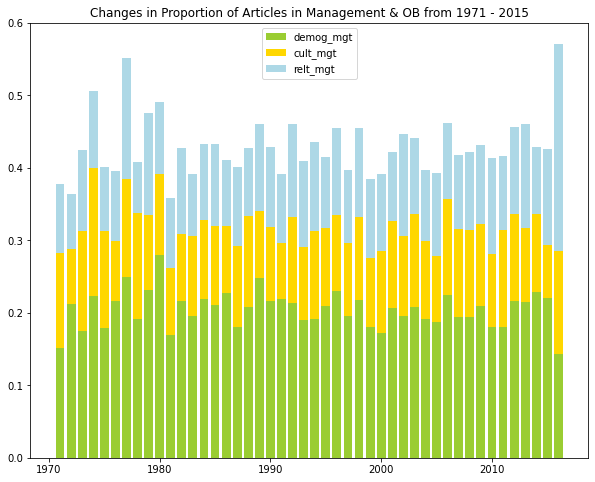

In [139]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)


ax = plt.gca()



gg = merged[merged['primary_subject'] == 'Management & Organizational Behavior'].groupby('publicationYear').count()
years = list(gg.index)


a = plt.bar(years, demog_mgt_minority_prop, color = 'yellowgreen')
b = plt.bar(years, cult_mgt_minority_prop, bottom = demog_mgt_minority_prop, color = 'gold')
c = plt.bar(years, relt_mgt_minority_prop, bottom = demog_mgt_minority_prop + cult_mgt_minority_prop, color = 'lightblue')
# d = plt.bar(years, cult_soc_minority_prop, bottom = demog_mgt_minority_prop + cult_mgt_minority_prop + relt_mgt_minority_prop, color = 'coral')
# e = plt.bar(years, relt_soc_minority_prop, bottom = demog_mgt_minority_prop + cult_mgt_minority_prop + relt_mgt_minority_prop + cult_soc_minority_prop, color = 'gainsboro')
# f = plt.bar(years, demog_soc_minority_prop, bottom = demog_mgt_minority_prop + cult_mgt_minority_prop + relt_mgt_minority_prop + cult_soc_minority_prop + relt_soc_minority_prop, color = 'orange')
plt.legend(['demog_mgt', 'cult_mgt', 'relt_mgt', 'cult_soc','relt_soc', 'demog_soc' ])
plt.title('Changes in Proportion of Articles in Management & OB from 1971 - 2015')


Text(0.5, 1.0, 'Changes in Proportion of Articles in Organizational Sociology from 1971 - 2015')

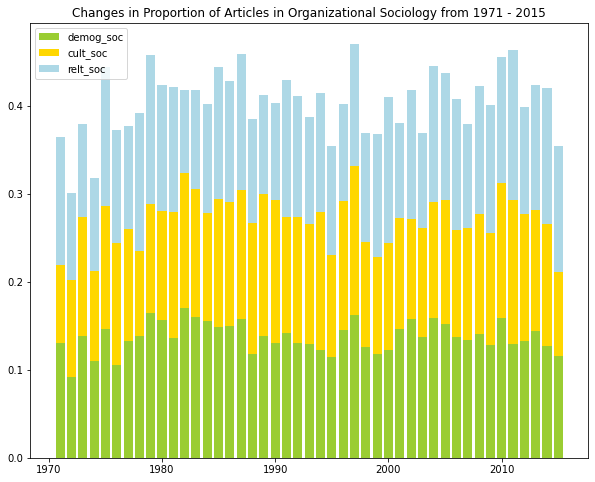

In [183]:
## Changes in Proportion of Articles in Organizational Sociology from 1971 - 2015
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)


gg = df_orgsoc.groupby('publicationYear').count()
years = list(gg.index)

# gg = df[df['primary_subject_y'] == 'Sociology'].groupby('publicationYear').count()
# years = list(gg.index)


ax = plt.gca()

d = plt.bar(years[1:-1], demog_soc_minority_prop_os[1:-1], color = 'yellowgreen')
e = plt.bar(years[1:-1], cult_soc_minority_prop_os[1:-1], bottom = demog_soc_minority_prop_os[1:-1], color = 'gold')
f = plt.bar(years[1:-1], relt_soc_minority_prop_os[1:-1], bottom =  demog_soc_minority_prop_os[1:-1] + cult_soc_minority_prop_os[1:-1], color = 'lightblue')


plt.legend([ 'demog_soc','cult_soc', 'relt_soc' ])


plt.title('Changes in Proportion of Articles in Organizational Sociology from 1971 - 2015')

Text(0.5, 1.0, 'Changes in Proportion of Articles in Sociology from 1971 - 2015')

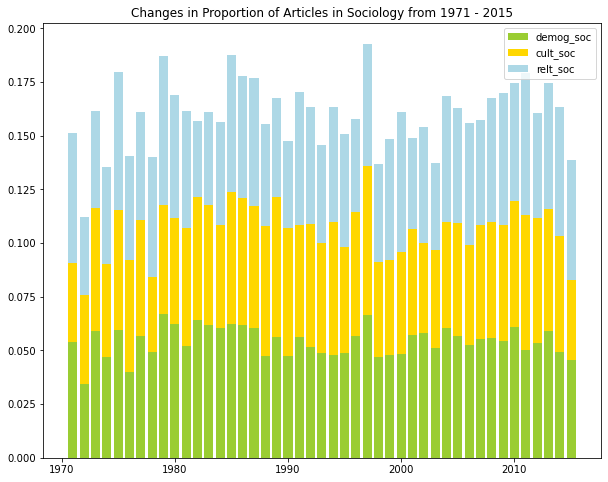

In [140]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)


gg = merged[merged['primary_subject'] == 'Sociology'].groupby('publicationYear').count()
years = list(gg.index)

# gg = df[df['primary_subject_y'] == 'Sociology'].groupby('publicationYear').count()
# years = list(gg.index)


ax = plt.gca()

d = plt.bar(years[1:-1], demog_soc_minority_prop[1:-1], color = 'yellowgreen')
e = plt.bar(years[1:-1], cult_soc_minority_prop[1:-1], bottom = demog_soc_minority_prop[1:-1], color = 'gold')
f = plt.bar(years[1:-1], relt_soc_minority_prop[1:-1], bottom =  demog_soc_minority_prop[1:-1] + cult_soc_minority_prop[1:-1], color = 'lightblue')


plt.legend([ 'demog_soc','cult_soc', 'relt_soc' ])


plt.title('Changes in Proportion of Articles in Sociology from 1971 - 2015')

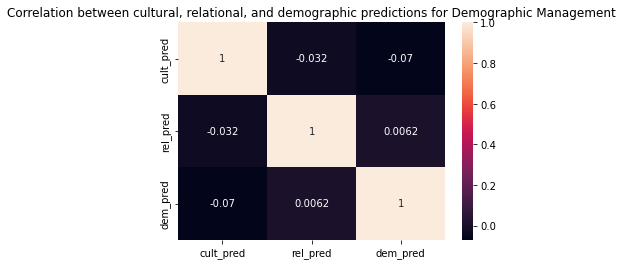

In [213]:
import seaborn as sns
  
# checking correlation using heatmap
   
#ploting the heatmap for correlation
ax = sns.heatmap(df_demog_mgt_minority[['cult_pred','rel_pred','dem_pred']].corr(), annot=True)
plt.title('Correlation between cultural, relational, and demographic predictions for Demographic Management');

### Plot Trends for 25th, 50th, 75th Percentile and Mean

In [190]:
cols_wanted = ['article_name','jstor_url', 'abstract', 'jstor_url', 'journal_title',
       'edited_filename', 'primary_subject',  'publicationYear',
        'cult_pred',
       'cult_score', 'rel_pred', 'rel_score', 'dem_pred', 'dem_score','org_pred', 'org_score']

In [198]:
# 25th percentile
df_25_soc = df_orgsoc[
    cols_wanted].groupby(by=['publicationYear']).quantile(0.25).reset_index()

df_25_mgt = merged[merged['primary_subject'] == 'Management & Organizational Behavior'][
    cols_wanted].groupby(by=['publicationYear']).quantile(0.25).reset_index()

# 50th percentile (Median)
df_50_soc = df_orgsoc[
    cols_wanted].groupby(by=['publicationYear']).quantile(0.5).reset_index()

df_50_mgt = merged[merged['primary_subject'] == 'Management & Organizational Behavior'][
    cols_wanted].groupby(by=['publicationYear']).quantile(0.5).reset_index()

# 75th percentile
df_75_soc = df_orgsoc[
    cols_wanted].groupby(by=['publicationYear']).quantile(0.75).reset_index()

df_75_mgt = merged[merged['primary_subject'] == 'Management & Organizational Behavior'][
    cols_wanted].groupby(by=['publicationYear']).quantile(0.75).reset_index()


# Designate percentiles
df_25_soc['percentile'] = '25th'
df_25_mgt['percentile'] = '25th'

df_50_soc['percentile'] = '50th'
df_50_mgt['percentile'] = '50th'

df_75_soc['percentile'] = '75th'
df_75_mgt['percentile'] = '75th'


# Combine percentile scores
df_pct_soc = pd.concat([df_25_soc, df_50_soc, df_75_soc])

df_pct_mgt = pd.concat([df_25_mgt, df_50_mgt, df_75_mgt])

# Mean/average
df_mean_soc = df_orgsoc[
    cols_wanted].groupby(by=['publicationYear']).apply(lambda pred: np.mean(pred)).reset_index(drop=True)

df_mean_mgt = merged[merged['primary_subject'] == 'Management & Organizational Behavior'][
    cols_wanted].groupby(by=['publicationYear']).apply(lambda pred: np.mean(pred)).reset_index(drop=True)

df_mean_soc['percentile'] = 'Mean'
df_mean_mgt['percentile'] = 'Mean'

# df_mean_soc = df_mean_soc.drop(columns = 'publicationYear')
# df_mean_mgt = df_mean_mgt.drop(columns = 'publicationYear')

# Combine percentile scores
df_pct_soc = pd.concat([df_pct_soc, df_mean_soc])
df_pct_mgt = pd.concat([df_pct_mgt, df_mean_mgt])

df_pct_soc = df_pct_soc.reset_index()
df_pct_mgt = df_pct_mgt.reset_index()

/tmp/ipykernel_4170/3009696953.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_25_soc = df_orgsoc[
/tmp/ipykernel_4170/3009696953.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_25_mgt = merged[merged['primary_subject'] == 'Management & Organizational Behavior'][
/tmp/ipykernel_4170/3009696953.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_50_soc = df_orgsoc[
/tmp/ipykernel_4170/3009696953.py:12: FutureWarning: Dropping invalid columns in DataFrameG

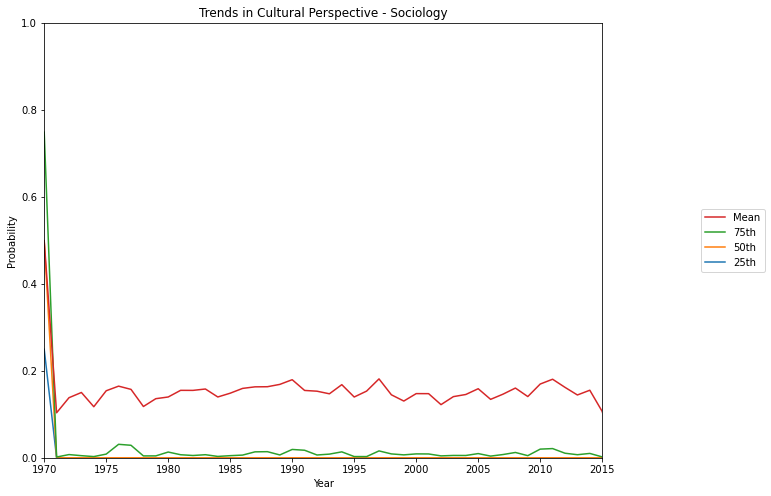

In [201]:
## CULTURAL

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

ax = sns.lineplot(x="publicationYear", y="cult_score", data=df_pct_soc, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Cultural Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

# fig.set_size_inches(8, 6)
# title = f"cult_soc_trends_{str(thisday)}_MLP_unphrased"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
# plt.show()

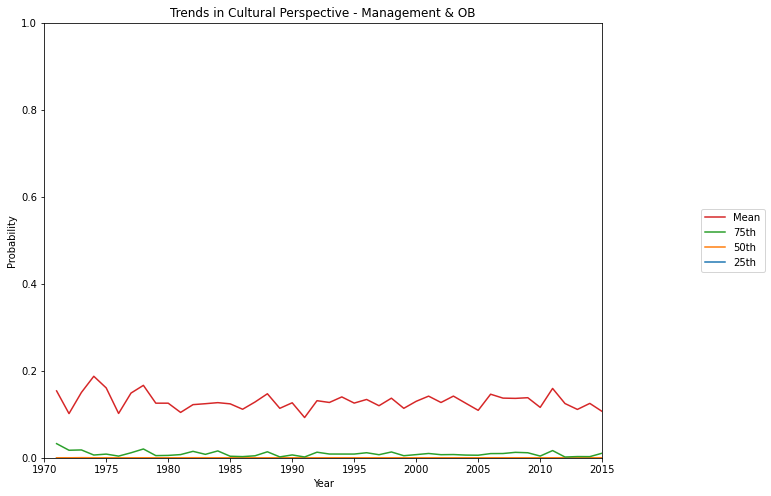

In [202]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

ax = sns.lineplot(x="publicationYear", y="cult_score", data=df_pct_mgt, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Cultural Perspective - Management & OB')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)


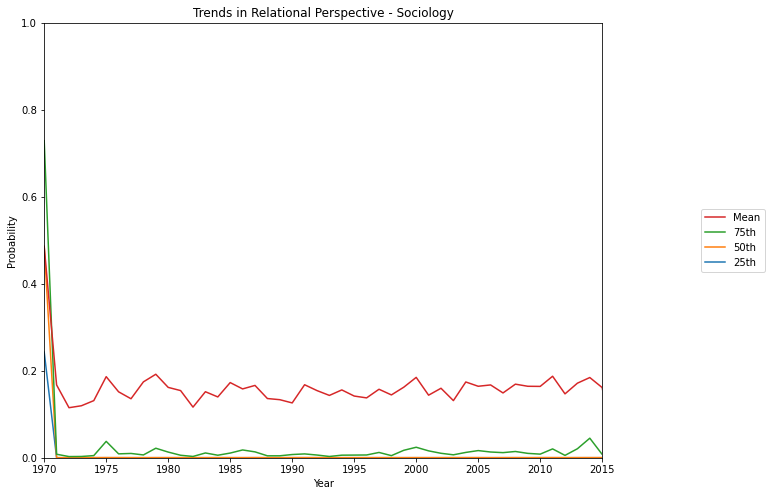

In [203]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
ax = sns.lineplot(x="publicationYear", y="rel_score", data=df_pct_soc, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Relational Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

# fig.set_size_inches(8, 6)
# title = f"relt_soc_trends_{str(thisday)}_MLP_unphrased"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
# plt.show()

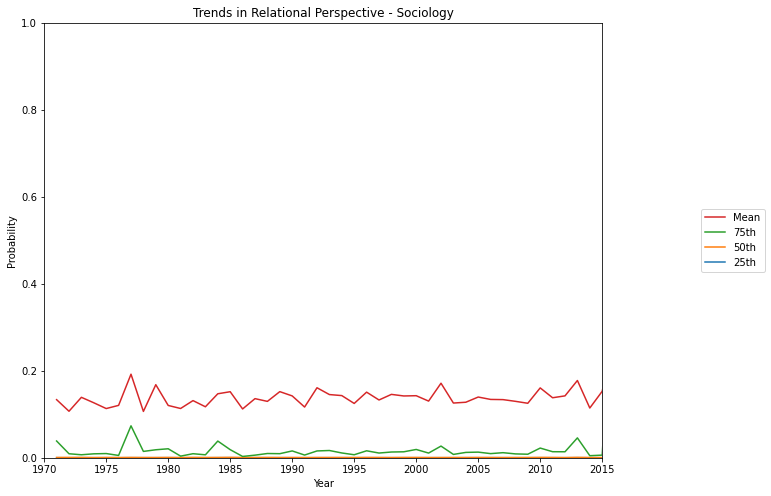

In [204]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
ax = sns.lineplot(x="publicationYear", y="rel_score", data=df_pct_mgt, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Relational Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

# fig.set_size_inches(8, 6)
# title = f"relt_soc_trends_{str(thisday)}_MLP_unphrased"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
# plt.show()

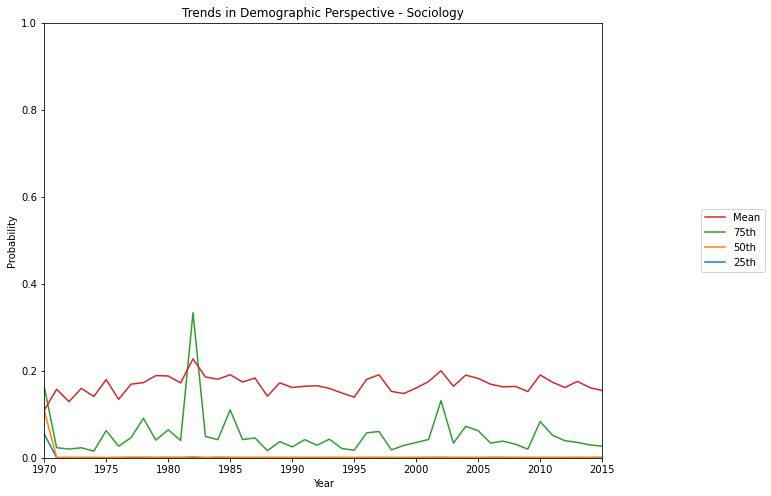

In [205]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
ax = sns.lineplot(x="publicationYear", y="dem_score", data=df_pct_soc, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Demographic Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

# fig.set_size_inches(8, 6)
# title = f"relt_soc_trends_{str(thisday)}_MLP_unphrased"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
# plt.show()

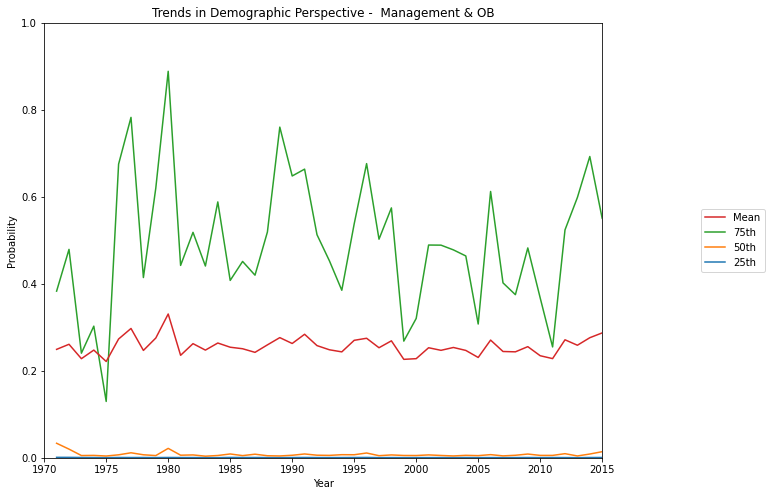

In [206]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
ax = sns.lineplot(x="publicationYear", y="dem_score", data=df_pct_mgt, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Probability')
ax.set(xlim=(1970, 2015))
ax.set(ylim=(0.0, 1.0))

ax.set_title('Trends in Demographic Perspective -  Management & OB')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

# fig.set_size_inches(8, 6)
# title = f"relt_soc_trends_{str(thisday)}_MLP_unphrased"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
# plt.show()

## Generate Samples for Hand Coding

In [141]:
def stratified_sample_df(df, col, n_samples):
    '''Get random sample of n_samples from df weighted/stratified by col.
    Source: https://stackoverflow.com/questions/44114463/stratified-sampling-in-pandas'''
    
    n = min(n_samples, df[col].value_counts().min()) # determine number of rows by lowest n per group in col
    df_sampled = df.groupby(col).apply(lambda x: x.sample(n)) # randomly sample n rows from each group
    
    # Ensure we only get desired sample size
    if len(df_sampled) > n_samples:
        df_sampled = df_sampled.sample(n = n_samples)
    
    df_sampled.index = df_sampled.index.droplevel(0) # drop index
    
    return df_sampled

In [142]:
def sample_rows_weighted(df, 
                         df_minority, 
                         df_majority, 
                         df_fuzzy, 
                         sample_size=50, 
                         prop_min = 0.4, 
                         prop_maj = 0.2, 
                         prop_fuzzy = 0.4, 
                         stratify_cols = []):
    '''
    Samples from DF using data objects computed above: minority DF (likely to be in minority class), 
    majority DF (likely in majority class), and fuzzy DF (uncertain to be in majority class).
    Stratifies the sample using columns passed in. When necessary, 
    supplements stratified sampling with random sampling to reach desired sample size.
    
    Args:
        df (DataFrame): original df with id and full text
        df_minority (DataFrame): DF with cases from minority class (with rows above threshold, computed above)
        df_majority (DataFrame): DF with cases from majority class (with rows below threshold, computed above)
        df_fuzzy (DataFrame): DF with cases not certainly classified (with rows between thresholds, computed above)
        sample_size (int): number of total rows to sample
        prop_min (float): proportion of total rows to be minority label
        prop_maj (float): proportion of total rows to be majority label
        prop_fuzzy (float): proportion of total rows to be fuzzy predictions
        stratify_cols (list): columns of DF to use for sample stratification/weighting, from last to first
        
    Returns:
        DataFrame: combined samples
    '''
    
    df_sample = pd.DataFrame() # initialize final sample DF
    fnames = [] # initialize list of articles (file names) to sample
    
    # Weighted sampling prep
    min_size = int(prop_min*sample_size) # number of rows to gather from df_minority
    maj_size = int(prop_maj*sample_size) # number of rows to gather from df_majority
    fuzzy_size = int(prop_fuzzy*sample_size) # number of rows to gather from df_fuzzy
    
    minority_sample_each = int(min_size/len(stratify_cols)) # number to sample for each loop of stratified sampling from df_minority
    majority_sample_each = int(maj_size/len(stratify_cols)) # number to sample for each loop of stratified sampling from df_majority
    fuzzy_sample_each = int(fuzzy_size/len(stratify_cols)) # number to sample for each loop of stratified sampling from df_majority
    
    # Get random sample of minority cases
    for col in stratify_cols:
        num_samples = 0 # placeholder for number cases sampled
        
        # Minority sample
        names_temp = stratified_sample_df(
            df_minority, 
            col = col, 
            n_samples = minority_sample_each)['file_name']
        fnames.extend(names_temp); num_samples += len(names_temp)
        #if len(names_temp) < minority_sample_each:
        #    diff = len(names_temp) - minority_sample_each
        #    new = df_minority.sample(n = diff)
        #    fnames.extend(new); num_samples += len(new)
            
        # Majority sample
        names_temp = stratified_sample_df(
            df_majority, 
            col = col, 
            n_samples = majority_sample_each)['file_name']
        
        fnames.extend(names_temp); num_samples += len(names_temp)
        #if len(names_temp) < majority_sample_each:
        #    diff = len(names_temp) - majority_sample_each
        #    new = df_majority.sample(n = diff)
        #    fnames.extend(new); num_samples += len(new)
        
        # Fuzzy sample
        names_temp = stratified_sample_df(
            df_fuzzy, 
            col = col, 
            n_samples = fuzzy_sample_each)['file_name']
        fnames.extend(names_temp); num_samples += len(names_temp)
        #if len(names_temp) < fuzzy_sample_each:
        #    diff = len(names_temp) - fuzzy_sample_each
        #    new = df_fuzzy.sample(n = diff)
        #    fnames.extend(new); num_samples += len(new)
        
        #print(f'Gathered {str(num_samples)} for {col}, expected {str(sample_size/len(stratify_cols))}')
        
    for fname in tqdm(fnames, desc="Merging samples"):
        df_sample = df_sample.append(df.loc[df['file_name'] == fname],ignore_index=True)
    #for id in tqdm(df_fuzzy['id'].sample(n=maj_size)):
    #    df_sample = df_sample.append(df.loc[df['id'] == id][['id','created_at','full_text']],ignore_index=True)
    
    #df_sample = df_sample.sample(n = sample_size, random_state = 43).reset_index(drop=True) # finalize sample of size = sample_size
    
    print(f'Returning weighted sample DF of {len(df_sample)} rows, asked for {sample_size} rows.')
    
    return df_sample
        

In [143]:
def check_pred_fuzzy(row, 
                     pred_labels = [1,0], 
                     myth_labels = ['cult', 'relt', 'demog'],
                     upper_threshold=0.3, 
                     lower_threshold=0.0):
    
    '''
    Checks whether prediction is fuzzy/unreliable. Use this to determine if a tweet is worth hand-coding.
    Rationale: by only coding tweets with unreliable labels, we can improve the classifier's ability to detect 'unsure' cases.
    
    Function focuses on this difference: prob(predicted label) - prob(some other label).
    If difference is greater than lower_threshold (minimum for hand-coding of tweet to be possible), 
    but lesser than upper_threshold (maximum for hand-coding to be necessary), then it IS worth coding, so return True. 
    If difference is not between these, then we either it can't be reliably coded, or already have a reliable prediction,
    so we don't need to hand-code --> return False.

    To help select a threshold, ask: To what extent do we want the uncertainty to be, to help inform our sample selection?    
    For example, if a tweet is labeled as POS with 90% prob and NEG 10% --> this is very obvious sample, so don't bother coding.
    On the other hand, if the predictions are 51% NEG and 49 POS, then we need ppl to label this to update our model. 
    If our upper_threshold is 20% (0.20), then if a tweet has 61% NEG 39% POS probabilities, we don't choose it. 
    If some other tweet has prob 59% POS 41% NEG, we do select it for coding.
    
    Args:
        row: row corresponding to tweet, with predictions in format...
        pred_labels: labels for probabilities to use--used for naming columns
        myth_labels: labels for COVID-19 myths to detect--used for naming columns
        upper_threshold: max difference between predicted probs
        lower_threshold: min difference between predicted probs
    
    Returns:
        Array: True if tweet should be hand-coded, otherwise False. Array contains determinations for all myths
    '''
    
    worth_coding = []
    
    for myth in myth_labels:
        pred_label = row[f'{myth}_pred'] # get label of prediction for tweet--must be one of those in possible_labels!
        pred_score = float(row[f'{myth}_score']) # get probability of predicted label (probably high)
        
        for pred in pred_labels: # Look at each label
#             pred = pred.strip() # clean label text
            
            if pred != pred_label: # if this label isn't the predicted one...
                difference = pred_score - float(row[f'{myth}_score']) # ...then look at their difference in probability
                if lower_threshold <= difference <= upper_threshold:
                 # if difference in probs is > lower_threshold but < upper_threshold, then pred is fuzzy and we should code
                    worth_coding.append(True) # worth coding
                
                else: worth_coding.append(False)
                    
    if len(worth_coding) == 1:
        return worth_coding[0]
    
    else: return worth_coding

In [144]:
from tqdm import tqdm
tqdm.pandas()


In [145]:
# Get fuzzy categories for management/OB
df_cult_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['cult'], 
                                                                                                                                  lower_threshold = 0, upper_threshold = .3), axis=1)]      
df_relt_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['rel'], 
                                                                                                                                  lower_threshold = 0, upper_threshold = .3), axis=1)]
df_demog_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['dem'], 
                                                                                                                                   lower_threshold = 0, upper_threshold = .3), axis=1)]

print(f'Number of fuzzy predictions for cultural mgt: {df_cult_mgt_fuzzy.shape}')
print(f'Number of fuzzy predictions for relational mgt: {df_relt_mgt_fuzzy.shape}')
print(f'Number of fuzzy predictions for demographic mgt: {df_demog_mgt_fuzzy.shape}')

100%|██████████| 65365/65365 [00:01<00:00, 48341.22it/s]
/tmp/ipykernel_4170/47188450.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cult_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['cult'],
100%|██████████| 65365/65365 [00:01<00:00, 50772.21it/s]
/tmp/ipykernel_4170/47188450.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_relt_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['rel'],
100%|██████████| 65365/65365 [00:01<00:00, 50712.94it/s]

Number of fuzzy predictions for cultural mgt: (17318, 38)
Number of fuzzy predictions for relational mgt: (17318, 38)
Number of fuzzy predictions for demographic mgt: (17318, 38)



/tmp/ipykernel_4170/47188450.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_demog_mgt_fuzzy = merged[merged['primary_subject']=='Management & Organizational Behavior'][merged.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['dem'],


In [147]:
print('Number of cases selected from Management/OB:')

n_sample = 50

cult_mgt_sample_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                   df_cult_mgt_minority, 
                                   df_cult_mgt_majority, 
                                   df_cult_mgt_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0, 
                                   prop_maj = 0, 
                                   prop_fuzzy = 1.0, 
                                   stratify_cols = ['journal_title', 'publicationYear'])
                          
relt_mgt_sample_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                   df_relt_mgt_minority, 
                                   df_relt_mgt_majority, 
                                   df_relt_mgt_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0, 
                                   prop_maj = 0, 
                                   prop_fuzzy = 1.0,
                                   stratify_cols = ['journal_title', 'publicationYear'])

demog_mgt_sample_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                    df_demog_mgt_minority, 
                                    df_demog_mgt_majority, 
                                    df_demog_mgt_fuzzy, 
                                    sample_size = n_sample, 
                                    prop_min = 0, 
                                    prop_maj = 0, 
                                    prop_fuzzy = 1.0, 
                                    stratify_cols = ['journal_title', 'publicationYear'])

Number of cases selected from Management/OB:


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 206.90it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 206.11it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 173.51it/s]

Returning weighted sample DF of 50 rows, asked for 50 rows.


In [149]:
print('Number of cases selected from Management/OB:')

n_sample = 50

cult_mgt_sample_non_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                   df_cult_mgt_minority, 
                                   df_cult_mgt_majority, 
                                   df_cult_mgt_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0.6, 
                                   prop_maj = 0.4, 
                                   prop_fuzzy = 0, 
                                   stratify_cols = ['journal_title', 'publicationYear'])
                          
relt_mgt_sample_non_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                   df_relt_mgt_minority, 
                                   df_relt_mgt_majority, 
                                   df_relt_mgt_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0.6, 
                                   prop_maj = 0.4, 
                                   prop_fuzzy = 0,
                                   stratify_cols = ['journal_title', 'publicationYear'])

demog_mgt_sample_non_fuzz = sample_rows_weighted(merged[merged['primary_subject']=='Management & Organizational Behavior'],
                                    df_demog_mgt_minority, 
                                    df_demog_mgt_majority, 
                                    df_demog_mgt_fuzzy, 
                                    sample_size = n_sample, 
                                    prop_min = 0.6, 
                                    prop_maj = 0.4, 
                                    prop_fuzzy = 0, 
                                    stratify_cols = ['journal_title', 'publicationYear'])

Number of cases selected from Management/OB:


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 208.48it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 204.52it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 205.10it/s]

Returning weighted sample DF of 50 rows, asked for 50 rows.


In [151]:
# et fuzzy categories for Sociology
df_cult_soc_fuzzy = df_orgsoc[df_orgsoc.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['cult'], 
                                                                                  lower_threshold = 0.0, upper_threshold = .3), axis=1)]      
df_relt_soc_fuzzy = df_orgsoc[df_orgsoc.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['rel'], 
                                                                                 lower_threshold = 0., upper_threshold = .3), axis=1)]
df_demog_soc_fuzzy = df_orgsoc[df_orgsoc.progress_apply(lambda x: check_pred_fuzzy(x, myth_labels = ['dem'], 
                                                                                  lower_threshold = 0., upper_threshold = .3), axis=1)]

print(f'Number of fuzzy predictions for cultural soc: {df_cult_soc_fuzzy.shape}')
print(f'Number of fuzzy predictions for relational soc: {df_relt_soc_fuzzy.shape}')
print(f'Number of fuzzy predictions for demographic soc: {df_demog_soc_fuzzy.shape}')

100%|██████████| 18957/18957 [00:00<00:00, 52541.47it/s]

Number of fuzzy predictions for cultural soc: (18957, 38)
Number of fuzzy predictions for relational soc: (18957, 38)
Number of fuzzy predictions for demographic soc: (18957, 38)


In [152]:
print('Number of cases selected from Organizational Sociology:')
n_sample = 50

cult_soc_sample_non_fuzz = sample_rows_weighted(df_orgsoc,
                                   df_cult_soc_minority, 
                                   df_cult_soc_majority, 
                                   df_cult_soc_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0.6, 
                                   prop_maj = 0.4, 
                                   prop_fuzzy = 0, 
                                   stratify_cols = ['journal_title', 'publicationYear'])
                          
relt_soc_sample_non_fuzz = sample_rows_weighted(df_orgsoc,
                                   df_relt_soc_minority, 
                                   df_relt_soc_majority, 
                                   df_relt_soc_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0.6, 
                                   prop_maj = 0.4, 
                                   prop_fuzzy = 0,
                                   stratify_cols = ['journal_title', 'publicationYear'])

demog_soc_sample_non_fuzz = sample_rows_weighted(df_orgsoc,
                                    df_demog_soc_minority, 
                                    df_demog_soc_majority, 
                                    df_demog_soc_fuzzy, 
                                    sample_size = n_sample, 
                                    prop_min = 0.6, 
                                    prop_maj = 0.4, 
                                    prop_fuzzy = 0,
                                    stratify_cols = ['journal_title', 'publicationYear'])

Number of cases selected from Organizational Sociology:


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 193.12it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 198.87it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 203.12it/s]

Returning weighted sample DF of 50 rows, asked for 50 rows.


In [153]:
print('Number of cases selected from Organizational Sociology:')
n_sample = 50

cult_soc_sample_fuzz = sample_rows_weighted(df_orgsoc,
                                   df_cult_soc_minority, 
                                   df_cult_soc_majority, 
                                   df_cult_soc_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0, 
                                   prop_maj = 0, 
                                   prop_fuzzy = 1, 
                                   stratify_cols = ['journal_title', 'publicationYear'])
                          
relt_soc_sample_fuzz = sample_rows_weighted(df_orgsoc,
                                   df_relt_soc_minority, 
                                   df_relt_soc_majority, 
                                   df_relt_soc_fuzzy, 
                                   sample_size = n_sample, 
                                   prop_min = 0, 
                                   prop_maj = 0, 
                                   prop_fuzzy = 1,
                                   stratify_cols = ['journal_title', 'publicationYear'])

demog_soc_sample_fuzz = sample_rows_weighted(df_orgsoc,
                                    df_demog_soc_minority, 
                                    df_demog_soc_majority, 
                                    df_demog_soc_fuzzy, 
                                    sample_size = n_sample, 
                                    prop_min = 0, 
                                    prop_maj =0, 
                                    prop_fuzzy = 1,
                                    stratify_cols = ['journal_title', 'publicationYear'])

Number of cases selected from Organizational Sociology:


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 197.60it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 195.21it/s]


Returning weighted sample DF of 50 rows, asked for 50 rows.


Merging samples: 100%|██████████| 50/50 [00:00<00:00, 198.45it/s]

Returning weighted sample DF of 50 rows, asked for 50 rows.


In [166]:
cols_wanted = ['article_name','jstor_url', 'abstract', 'jstor_url', 'journal_title',
       'edited_filename', 'primary_subject',  'publicationYear',
        'cult_pred',
       'cult_score', 'rel_pred', 'rel_score', 'dem_pred', 'dem_score','org_pred', 'org_score']

In [208]:
relt_soc_sample_fuzz = relt_soc_sample_fuzz[cols_wanted]
demog_soc_sample_fuzz = demog_soc_sample_fuzz[cols_wanted]
cult_soc_sample_fuzz = cult_soc_sample_fuzz[cols_wanted]
relt_mgt_sample_fuzz = relt_mgt_sample_fuzz[cols_wanted]
demog_mgt_sample_fuzz = demog_mgt_sample_fuzz[cols_wanted]
cult_mgt_sample_fuzz = cult_mgt_sample_fuzz[cols_wanted]
relt_soc_sample_non_fuzz = relt_soc_sample_non_fuzz[cols_wanted]
demog_soc_sample_non_fuzz = demog_soc_sample_non_fuzz[cols_wanted]
cult_soc_sample_non_fuzz = cult_soc_sample_non_fuzz[cols_wanted]
relt_mgt_sample_non_fuzz = relt_mgt_sample_non_fuzz[cols_wanted]
demog_mgt_sample_non_fuzz = demog_mgt_sample_non_fuzz[cols_wanted]
cult_mgt_sample_non_fuzz = cult_mgt_sample_non_fuzz[cols_wanted]

In [ ]:
# Save random samples in .csv format
for dframe, name in list(zip([relt_soc_sample_fuzz, demog_soc_sample_fuzz, cult_soc_sample_fuzz, 
                              relt_mgt_sample_fuzz, demog_mgt_sample_fuzz, cult_mgt_sample_fuzz,
                             relt_soc_sample_non_fuzz, demog_soc_sample_non_fuzz, cult_soc_sample_non_fuzz, 
                              relt_mgt_sample_non_fuzz, demog_mgt_sample_non_fuzz, cult_mgt_sample_non_fuzz
                             
                             
                             ], 
                             ['soc_relt', 'soc_demog', 'soc_cult', 'mgt_relt', 'mgt_demog', 'mgt_cult',
                             'soc_relt_fuzzy', 'soc_demog_fuzzy', 'soc_cult_fuzzy', 'mgt_relt_fuzzy', 'mgt_demog_fuzzy', 'mgt_cult_fuzzy'
                             ])):
    
    # Add new, empty first columns to use for manual coding of engagement, notes, and whether uses some other perspective 
    col1 = "stance twd. " + str(name[4:]) + " persp. (1: positive; 0.5: maybe; 0: none)" # name of column to be first in DF
    col2 = "notes"
    col3 = "other persp.?"
    
    for col in [col3, col2, col1]: # To get final order right, loop over new cols in reverse order: 3rd col, then 2nd, then 1st
        dframe[col] = "" # create empty column
        popcol = dframe.pop(col) # extract empty column
        dframe.insert(0, col, popcol) # put empty column in beginning
    
    # Save each resulting DF to file
    path = 'sample/' + name + '_Longformer_' + f'{str(n_sample)}_{str(thisday)}'
    dframe.to_csv(path + '.csv', index=False)
    #var.to_excel(path + '.xlsx')